In [1]:
import numpy as np
from astropy.io import fits
from loguru import logger
from pathlib import Path

from surfh.Models import instru

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy import ndimage

from sklearn.decomposition import NMF
from einops import rearrange


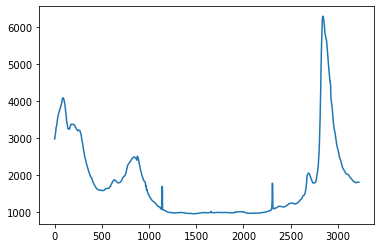

In [6]:
hdul = fits.open('/home/nmonnier/Data/JWST/Orion_bar/Scan/overwritten_ChannelCube_ch2-shortmediumlong_s3d.fits')
data_cube = hdul[1].data

# replace Nan with 0
data_cube[np.isnan(data_cube)] = 0

data = rearrange(data_cube, 'L I J -> (I J) L') # from spectro data

# Range of components to test
component_range = range(1, 12)  # Adjust based on how many tests you want to run

plt.plot(np.mean(data_cube, axis=(1,2)))

In [3]:
# List to store the reconstruction errors
reconstruction_errors = []

# Compute NMF for different numbers of components and calculate the reconstruction errors
for n_components in component_range:
    nmf = NMF(n_components=n_components, init='random', random_state=42)
    W = nmf.fit_transform(data)  # W is the weight matrix
    H = nmf.components_          # H is the feature matrix (components)
    reconstructed = W @ H        # Reconstruct the original matrix
    error = np.linalg.norm(data - reconstructed)  # Frobenius norm
    reconstruction_errors.append(error)

# Plotting the reconstruction errors
plt.figure(figsize=(10, 5))
plt.plot(component_range, reconstruction_errors, marker='o')
plt.title('Reconstruction Errors by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.grid(True)


/home/nmonnier/anaconda3/envs/mrs/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/home/nmonnier/anaconda3/envs/mrs/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/home/nmonnier/anaconda3/envs/mrs/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/home/nmonnier/anaconda3/envs/mrs/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/home/nmonnier/anaconda3/envs/mrs/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterati

KeyboardInterrupt: 

In [7]:
from sklearn.decomposition import NMF

# Initialize NMF with the desired number of components
nmf = NMF(n_components=4, init='random', random_state=31, max_iter=1000)

# Fit NMF model to your data
nmf.fit(data)

# Extract the components (eigenvectors)
components = nmf.components_

/home/nmonnier/anaconda3/envs/mrs/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


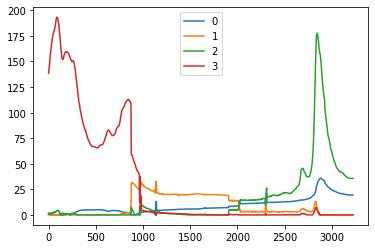

In [8]:
plt.figure()
for i in range(components.shape[0]):
    plt.plot(components[i], label=i)
plt.legend()

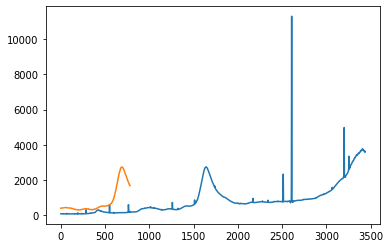

In [8]:
hdul = fits.open('/home/nmonnier/Data/JWST/Orion_bar/Scan/ChannelCube_ch1-shortmediumlong_s3d.fits')
data_cube = hdul[1].data

# replace Nan with 0
data_cube[np.isnan(data_cube)] = 0
data_cube[data_cube<0] = 0


data_filtered = ndimage.median_filter(data_cube[950:1733], size=13, axes=[0])


# Range of components to test
component_range = range(1, 12)  # Adjust based on how many tests you want to run
plt.plot(np.mean(data_cube, axis=(1,2)))
plt.plot(np.mean(data_filtered, axis=(1,2)))

data = rearrange(data_filtered.copy(), 'L I J -> (I J) L') # from spectro data


In [9]:
from sklearn.decomposition import NMF

# Initialize NMF with the desired number of components
nmf = NMF(n_components=4, init='random', random_state=31, max_iter=1000)

# Fit NMF model to your data
nmf.fit(data)

# Extract the components (eigenvectors)
components = nmf.components_

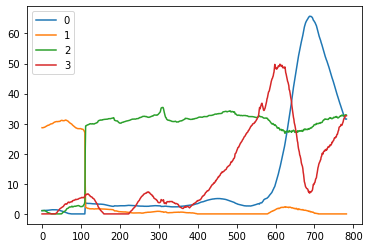

In [4]:
plt.figure()
for i in range(components.shape[0]):
    plt.plot(components[i], label=i)
plt.legend()
plt.show()

In [16]:
import numpy as np

# Target number of elements in the new matrix (width = 317)
target_width = 317

# Calculate the step size for downsampling
step = len(components[0]) // target_width
print(f'{len(components[0])}//{target_width} = {step}')
print(components.shape)

# Downsample by selecting every 'step' element along the width axis
downsampled_components = components[:, ::step]

# Ensure the new matrix has exactly 317 elements in the second dimension
# In case the division is not perfect, truncate to the correct size
# downsampled_components = downsampled_components[:, :target_width]
# print(downsampled_components.shape)
# 


783//317 = 2
(4, 783)


In [17]:
def reduce_vector_to_shape(vector, target_shape):
    """
    Reduce a vector by randomly removing elements to reach the specified target shape.
    
    Parameters:
    vector (np.ndarray): The input vector to reduce.
    target_shape (int): The target length of the vector.
    
    Returns:
    np.ndarray: The reduced vector.
    """
    original_shape = vector.shape[0]
    
    # Ensure the target shape is smaller than the original shape
    if target_shape >= original_shape:
        raise ValueError("Target shape must be smaller than the original vector length.")
    
    # Determine how many elements to remove
    num_elements_to_remove = original_shape - target_shape
    
    # Randomly select indices to remove
    indices_to_remove = np.random.choice(original_shape, num_elements_to_remove, replace=False)
    
    # Remove the selected elements
    reduced_vector = np.delete(vector, indices_to_remove)
    
    return reduced_vector


test1 = np.zeros((4, 317))
for i in range(4):
    print(downsampled_components[i].shape)
    test1[i] = reduce_vector_to_shape(downsampled_components[i], 317)
    print(test1[i].shape)


downsampled_components = downsampled_components[:, :target_width]


(392,)
(317,)
(392,)
(317,)
(392,)
(317,)
(392,)
(317,)


(4, 317)


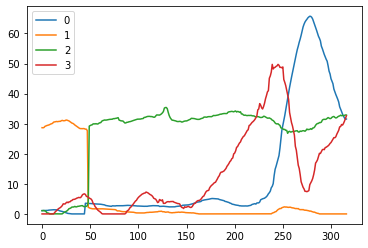

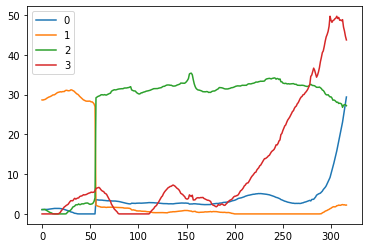

In [14]:
plt.figure()
for i in range(test1.shape[0]):
    plt.plot(test1[i], label=i)
plt.legend()
plt.figure()
for i in range(downsampled_components.shape[0]):
    plt.plot(downsampled_components[i], label=i)
plt.legend()
print(downsampled_components.shape)

In [18]:
np.save('/home/nmonnier/Data/JWST/Orion_bar/Fusion/Filtered_slices/templates.npy', test1)